# Imports

In [42]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load experiment results data

In [2]:
BASE_PATH = "../models/wav2vec2-base"

results = {}

for language in ["polish", "italian", "dutch"]:
    results[language] = {}
    
    for train_samples_size in [5000, 10000, 15000]:
        results[language][train_samples_size] = {}
        
        FILE_PATH = f"{BASE_PATH}/{language}/{train_samples_size}/checkpoint-15000/trainer_state.json"
        
        with open(FILE_PATH) as f:
            results[language][train_samples_size] = json.load(f)

In [9]:
results["dutch"][5000]["log_history"][:2]

[{'epoch': 0.2,
  'learning_rate': 9.960000000000001e-05,
  'loss': 3.471,
  'step': 1000},
 {'epoch': 0.2,
  'eval_loss': 2.9095447063446045,
  'eval_runtime': 703.6013,
  'eval_samples_per_second': 4.37,
  'eval_steps_per_second': 0.547,
  'eval_wer': 1.0,
  'step': 1000}]

# Train vs test loss across languages

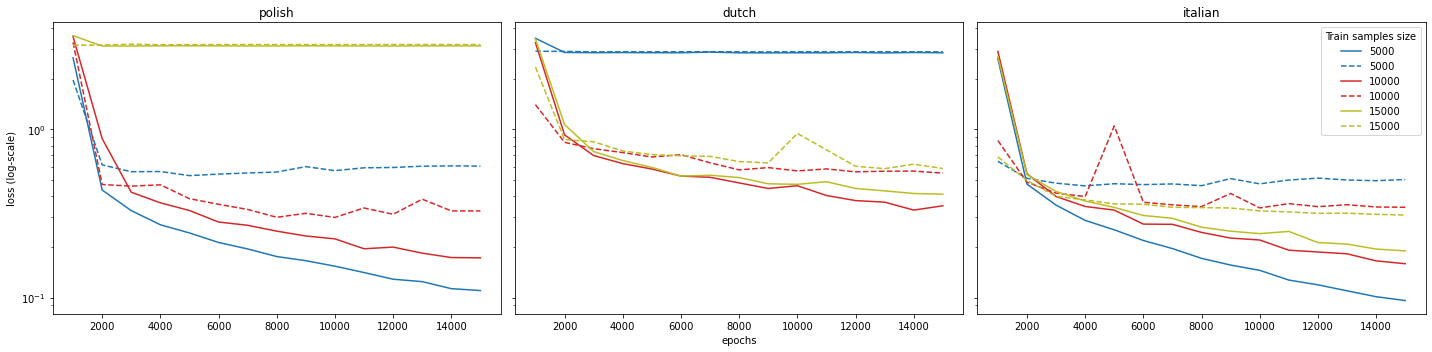

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True, tight_layout=True)

for index, language in enumerate(["polish", "dutch", "italian"]):        
    for train_samples_size, color in zip([5000, 10000, 15000], ["tab:blue", "tab:red", "tab:olive"]):
        train_loss = [item["loss"] for item in results[language][train_samples_size]["log_history"][0::2]]
        test_loss = [item["eval_loss"] for item in results[language][train_samples_size]["log_history"][1::2]]

        ax[index].plot(np.arange(1, len(train_loss) + 1) * 1000, train_loss, label=train_samples_size, color=color)
        ax[index].plot(np.arange(1, len(test_loss) + 1) * 1000, test_loss, linestyle="dashed", label=train_samples_size, color=color)
        ax[index].set_yscale('log')

    ax[index].title.set_text(language)
    
    if index == 0:
        ax[index].set_ylabel("loss (log-scale)")
        
    if index == 1:
        ax[index].set_xlabel("epochs")
    
    if index == 2:
        ax[index].legend(title="Train samples size")
        
plt.show()

# Test w.e.r across languages

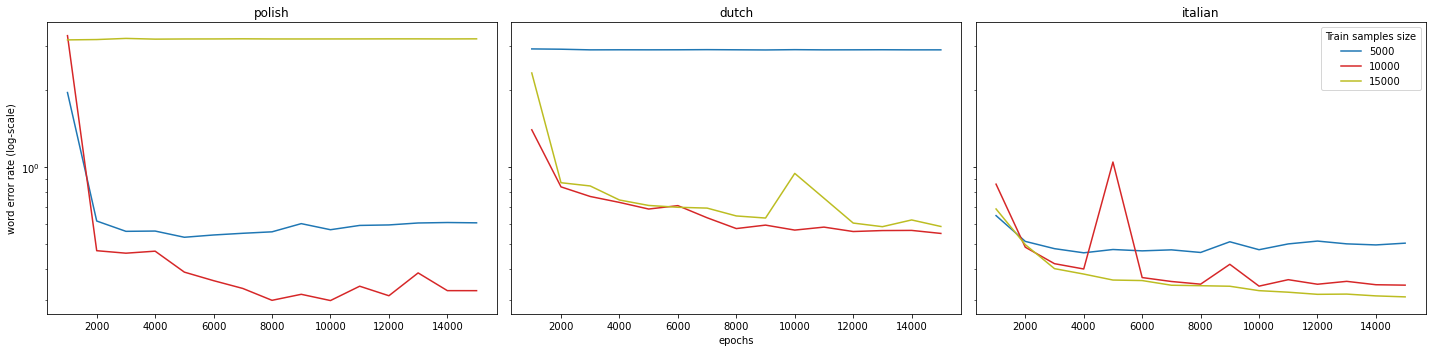

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True, tight_layout=True)

for index, language in enumerate(["polish", "dutch", "italian"]):        
    for train_samples_size, color in zip([5000, 10000, 15000], ["tab:blue", "tab:red", "tab:olive"]):
        # train_loss = [item["loss"] for item in results[language][train_samples_size]["log_history"][0::2]]
        # test_loss = [item["eval_loss"] for item in results[language][train_samples_size]["log_history"][1::2]]
        test_wer = [item["eval_loss"] for item in results[language][train_samples_size]["log_history"][1::2]]

        ax[index].plot(np.arange(1, len(test_wer) + 1) * 1000, test_wer, label=train_samples_size, color=color)
        ax[index].set_yscale('log')
        
    ax[index].title.set_text(language)
    
    if index == 0:
        ax[index].set_ylabel("word error rate (log-scale)")
        
    if index == 1:
        ax[index].set_xlabel("epochs")
    
    if index == 2:
        ax[index].legend(title="Train samples size")
        
plt.show()

# % change in test loss per config

In [65]:
data = {}

for language in ["polish", "dutch", "italian"]:        
    data[language] = {}
    
    for train_samples_size in [5000, 10000, 15000]:
        data[language][train_samples_size] = round((results[language][train_samples_size]["log_history"][1]["eval_loss"] - results[language][train_samples_size]["log_history"][-1]["eval_loss"]) * 100/results[language][train_samples_size]["log_history"][1]["eval_loss"], 2) 
        
print(pd.DataFrame(data).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  polish &  dutch &  italian \\
\midrule
5000  &   69.17 &   0.84 &    22.03 \\
10000 &   90.01 &  60.78 &    59.83 \\
15000 &   -0.94 &  75.00 &    54.80 \\
\bottomrule
\end{tabular}



# % change in test w.e.r per config

In [64]:
data = {}

for language in ["polish", "dutch", "italian"]:        
    data[language] = {}
    
    for train_samples_size in [5000, 10000, 15000]:
        data[language][train_samples_size] = round((results[language][train_samples_size]["log_history"][1]["eval_wer"] - results[language][train_samples_size]["log_history"][-1]["eval_wer"]) * 100/results[language][train_samples_size]["log_history"][1]["eval_wer"], 2)
        
print(pd.DataFrame(data).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  polish &  dutch &  italian \\
\midrule
5000  &   39.80 &   0.00 &    37.79 \\
10000 &   61.02 &  46.00 &    50.76 \\
15000 &    0.00 &  49.42 &    49.83 \\
\bottomrule
\end{tabular}



In [67]:
results["italian"][5000]["log_history"][1]["eval_loss"]

0.6455346345901489

In [68]:
results["italian"][5000]["log_history"][-1]["eval_loss"]

0.5033310651779175